<a href="https://colab.research.google.com/github/BrouthenKamel/MNIST-CNN/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt

In [3]:
(X, y), (X_test, y_test) = keras.datasets.mnist.load_data()
assert X.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y.shape == (60000,)
assert y_test.shape == (10000,)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=1/3, stratify=y, random_state=42)
assert X_train.shape == (40000, 28, 28)
assert X_valid.shape == (20000, 28, 28)
assert y_train.shape == (40000,)
assert y_valid.shape == (20000,)

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_valid = X_valid.astype('float32')
X_train /= 255
X_test /= 255
X_valid /= 255

In [7]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_valid = keras.utils.to_categorical(y_valid)

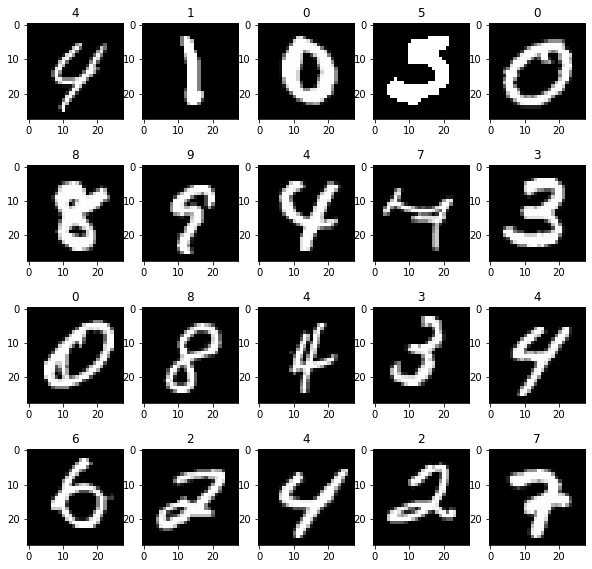

In [9]:
fig = plt.figure(figsize=(10, 10))
ax = []
rows = 4
cols = 5
for i in range(1, rows*cols+1):
  img = X_train[i-1]
  ax.append( fig.add_subplot(rows, columns, i) )
  ax[-1].set_title(str(y_train[i-1].argmax()))
  plt.imshow(img, cmap='gray')

In [10]:
y = np.concatenate((y_train, y_test, y_valid))

In [11]:
y.shape

(70000, 10)

In [12]:
y_pres = [y[i].argmax() for i in range(y.shape[0])]

In [17]:
y_df = pd.DataFrame(y_pres, columns=['digit'])

In [18]:
y_df

,digit
0,4
1,1
2,0
3,5
4,0
...,...
69995,9
69996,4
69997,9
69998,0


In [22]:
y_df.describe()

,digit
count,70000.000000
mean,4.452429
std,2.890195
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


In [24]:
y_df.value_counts()

digit
1        7877
7        7293
3        7141
2        6990
9        6958
0        6903
6        6876
8        6825
4        6824
5        6313
dtype: int64

In [28]:
from keras.models import Sequential
from keras.layers import Dense, MaxPool2D, Conv2D, Dropout, Flatten

In [31]:
from keras.backend import dropout
model = Sequential([
    Conv2D(32, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(28,28,1)),
    MaxPool2D((2,2)),
    Conv2D(64, kernel_size=(3,3), strides=(1,1)),
    MaxPool2D((2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.2),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(10, activation='softmax')
])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [32]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [34]:
history = model.fit(X_train, y_train,
                    validation_data=(X_valid, y_valid),
                    epochs=20,
                    verbose=1,
                    )

Epoch 1/20
1250/1250 - 41s - loss: 0.2266 - accuracy: 0.9317 - val_loss: 0.0677 - val_accuracy: 0.9786 - 41s/epoch - 33ms/step
Epoch 2/20
1250/1250 - 44s - loss: 0.0781 - accuracy: 0.9771 - val_loss: 0.0489 - val_accuracy: 0.9852 - 44s/epoch - 35ms/step
Epoch 3/20
1250/1250 - 39s - loss: 0.0583 - accuracy: 0.9832 - val_loss: 0.0445 - val_accuracy: 0.9865 - 39s/epoch - 31ms/step
Epoch 4/20
1250/1250 - 39s - loss: 0.0425 - accuracy: 0.9881 - val_loss: 0.0407 - val_accuracy: 0.9883 - 39s/epoch - 31ms/step
Epoch 5/20
1250/1250 - 39s - loss: 0.0355 - accuracy: 0.9893 - val_loss: 0.0511 - val_accuracy: 0.9872 - 39s/epoch - 31ms/step
Epoch 6/20
1250/1250 - 39s - loss: 0.0340 - accuracy: 0.9897 - val_loss: 0.0431 - val_accuracy: 0.9877 - 39s/epoch - 31ms/step
Epoch 7/20
1250/1250 - 38s - loss: 0.0247 - accuracy: 0.9923 - val_loss: 0.0507 - val_accuracy: 0.9875 - 38s/epoch - 31ms/step
Epoch 8/20
1250/1250 - 41s - loss: 0.0244 - accuracy: 0.9927 - val_loss: 0.0428 - val_accuracy: 0.9888 - 41s/ep

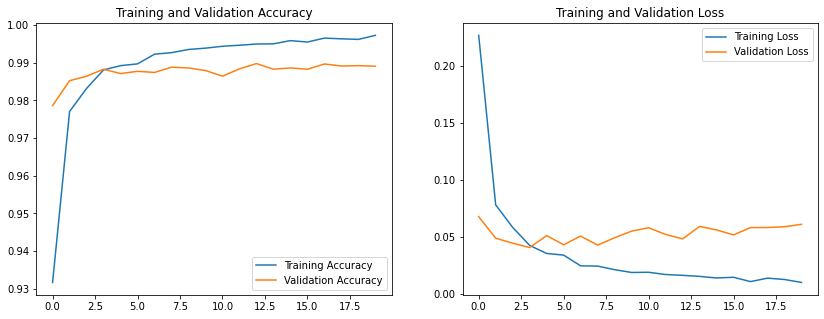

In [36]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()